In [1]:
!pip install pandas

!pip install import-ipynb

!pip install ipython

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [2]:
import pandas as pd

import import_ipynb

import propertyPurchaseImport as ppi

import averageIncomeImport as aii

importing Jupyter notebook from propertyPurchaseImport.ipynb
0    Year/Qrt National Dublin     Cork  Galway Limerick Waterford Other Areas
1      1975Q1   11,887  11,858  10,667  13,519   12,565    11,090      11,428
2      1975Q2   12,837  12,804  12,131  14,306   12,714    12,366      12,956
3      1975Q3   13,269  13,153  12,567  14,248   13,643    12,526      13,521
4      1975Q4   13,892  13,835  14,194  15,176   13,337    13,516      13,812
5      1976Q1   14,738  14,770  13,829  17,086   14,776    14,066      14,650
...       ...      ...     ...     ...     ...      ...       ...         ...
1529      NaN      NaN     NaN     NaN     NaN      NaN       NaN         NaN
1530      NaN      NaN     NaN     NaN     NaN      NaN       NaN         NaN
1531      NaN      NaN     NaN     NaN     NaN      NaN       NaN         NaN
1532      NaN      NaN     NaN     NaN     NaN      NaN       NaN         NaN
1533      NaN      NaN     NaN     NaN     NaN      NaN       NaN         NaN

[1

In [3]:
merged_table = pd.merge(ppi.trimmeddatahousing, aii.datawages, on='Time', how='inner')

In [4]:
print(merged_table)

    Year/Qrt National  Dublin   ...         Value Flag Codes Flags
0     1990Q1   65,366   78,269  ...  15349.510969        NaN   NaN
1     1990Q2   64,700   81,624  ...  15349.510969        NaN   NaN
2     1990Q3   66,772   85,497  ...  15349.510969        NaN   NaN
3     1990Q4   65,425   78,292  ...  15349.510969        NaN   NaN
4     1991Q1   67,007   80,914  ...  16411.982778        NaN   NaN
..       ...      ...      ...  ...           ...        ...   ...
100   2015Q1  267,517  360,876  ...  44106.001921        NaN   NaN
101   2015Q2  275,235  388,609  ...  44106.001921        NaN   NaN
102   2015Q3  285,015  373,518  ...  44106.001921        NaN   NaN
103   2015Q4  298,551  387,963  ...  44106.001921        NaN   NaN
104   2016Q1  309,703  402,211  ...  44901.182226        NaN   NaN

[105 rows x 23 columns]


In [5]:
merged_table.head(10)

,Year/Qrt,National,Dublin,Cork,Galway,Limerick,Waterford,Other Areas,Time,COUNTRY,Country,SERIES,Series,TIME,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,1990Q1,"65,366","78,269","60,231","66,233","63,717","51,515","56,277",1990,IRL,Ireland,CPNCU,Current prices in NCU,1990,EUR,Euro,0,Units,NaN,NaN,15349.510969,NaN,NaN
1,1990Q2,"64,700","81,624","61,185","67,906","59,727","52,849","53,210",1990,IRL,Ireland,CPNCU,Current prices in NCU,1990,EUR,Euro,0,Units,NaN,NaN,15349.510969,NaN,NaN
2,1990Q3,"66,772","85,497","60,800","68,490","64,898","56,533","56,411",1990,IRL,Ireland,CPNCU,Current prices in NCU,1990,EUR,Euro,0,Units,NaN,NaN,15349.510969,NaN,NaN
3,1990Q4,"65,425","78,292","61,935","69,168","60,945","55,846","57,127",1990,IRL,Ireland,CPNCU,Current prices in NCU,1990,EUR,Euro,0,Units,NaN,NaN,15349.510969,NaN,NaN
4,1991Q1,"67,007","80,914","65,286","67,319","65,253","53,418","56,892",1991,IRL,Ireland,CPNCU,Current prices in NCU,1991,EUR,Euro,0,Units,NaN,NaN,16411.982778,NaN,NaN
5,1991Q2,"64,974","76,436","62,132","62,561","61,756","51,183","57,320",1991,IRL,Ireland,CPNCU,Current prices in NCU,1991,EUR,Euro,0,Units,NaN,NaN,16411.982778,NaN,NaN
6,1991Q3,"66,694","78,462","63,462","67,958","64,593","52,474","58,970",1991,IRL,Ireland,CPNCU,Current prices in NCU,1991,EUR,Euro,0,Units,NaN,NaN,16411.982778,NaN,NaN
7,1991Q4,"69,070","79,732","67,248","69,198","66,471","56,821","61,186",1991,IRL,Ireland,CPNCU,Current prices in NCU,1991,EUR,Euro,0,Units,NaN,NaN,16411.982778,NaN,NaN
8,1992Q1,"69,688","78,980","66,805","72,450","62,776","55,046","60,898",1992,IRL,Ireland,CPNCU,Current prices in NCU,1992,EUR,Euro,0,Units,NaN,NaN,17601.759896,NaN,NaN
9,1992Q2,"68,764","78,389","65,162","71,616","60,768","52,881","61,591",1992,IRL,Ireland,CPNCU,Current prices in NCU,1992,EUR,Euro,0,Units,NaN,NaN,17601.759896,NaN,NaN


In [6]:
pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


KeyError: 'Dublin'

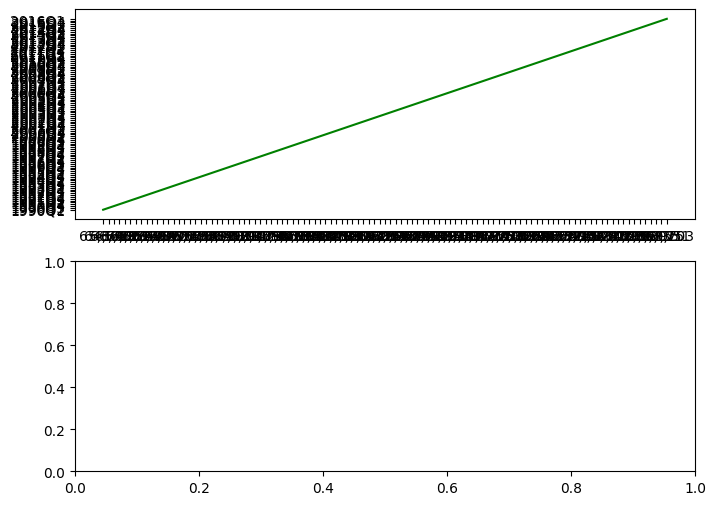

In [14]:
import matplotlib.pyplot as plt

import IPython

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(8,6))

ax1.plot(merged_table['National'], merged_table['Year/Qrt'], color='g')
ax2.plot(merged_table['Dublin'], merged_table['Year/Qrt'], color='r')

plt.show()

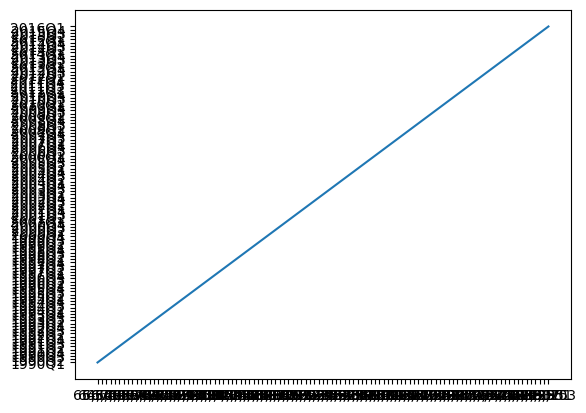

In [10]:
fig, ax = plt.subplots()

ax.plot(merged_table['National'], merged_table['Year/Qrt'])

plt.show()